### Capstone Project - Car collisions severity, weather, and road conditions

### Introduction
Car collisions can be caused by a variety of elements by different scopes. With the dataset in this study, two important factors - weather and road conditions are further analyzed in terms of their impact on the severity of a car collisions. Afterwards, the machine learning model Logistic Regression will be further deployed and evaluated for the respective accuracy level.

### Data Retrieval

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl

!wget -O Data_Collision.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv


--2020-08-30 19:07:42--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data_Collision.csv’

100%[======================================>] 73,917,638   936KB/s   in 57s    

2020-08-30 19:08:40 (1.24 MB/s) - ‘Data_Collision.csv’ saved [73917638/73917638]



In [2]:
df=pd.read_csv("Data_Collision.csv")
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### Data Balancing

In [3]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [4]:
from sklearn.utils import resample

df_majority = df[df.SEVERITYCODE==1]
df_minority = df[df.SEVERITYCODE==2]
 
df_majority_downsampled = resample(df_majority, 
                                 replace=True,    
                                 n_samples=58188,  
                                 random_state=123)
 
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
df_downsampled.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [5]:
dfnew=df[['SEVERITYCODE','WEATHER','ROADCOND']]
dfnew.head()
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 3 columns):
SEVERITYCODE    194673 non-null int64
WEATHER         189592 non-null object
ROADCOND        189661 non-null object
dtypes: int64(1), object(2)
memory usage: 4.5+ MB


### Feature Selection

In [6]:
Feature = df[['WEATHER','ROADCOND']]
Feature = pd.concat([Feature,pd.get_dummies(df['WEATHER'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['ROADCOND'])], axis=1)
Feature.drop(['WEATHER','ROADCOND'], axis = 1,inplace=True)
Feature.head()

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [7]:
X = Feature
X[0:5]
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

### Data Standardization

In [8]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[-0.01696304, -1.15340914, -0.05414257, -0.06551471,  2.45445634,
        -0.00506801, -0.45298634, -0.011333  , -0.02409974, -0.06841713,
        -0.28988624, -1.33213439, -0.07905204, -0.01813462, -0.02604842,
        -0.01963186, -0.07200071, -0.02431221, -0.28975087,  1.76085874],
       [-0.01696304, -1.15340914, -0.05414257, -0.06551471, -0.4074222 ,
        -0.00506801,  2.2075721 , -0.011333  , -0.02409974, -0.06841713,
        -0.28988624, -1.33213439, -0.07905204, -0.01813462, -0.02604842,
        -0.01963186, -0.07200071, -0.02431221, -0.28975087,  1.76085874],
       [-0.01696304, -1.15340914, -0.05414257, -0.06551471,  2.45445634,
        -0.00506801, -0.45298634, -0.011333  , -0.02409974, -0.06841713,
        -0.28988624,  0.75067501, -0.07905204, -0.01813462, -0.02604842,
        -0.01963186, -0.07200071, -0.02431221, -0.28975087, -0.56790473],
       [-0.01696304,  0.86699503, -0.05414257, -0.06551471, -0.4074222 ,
        -0.00506801, -0.45298634, -0.011333  , -

### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 20) (155738,)
Test set: (38935, 20) (38935,)


### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

In [24]:
solvers = ['lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag']
regularization_val = [0.1, 0.01, 0.001]
index = []
accuracy_score = []
iterations = 0
for index1, c in enumerate(regularization_val):
    for index2, solver in enumerate(solvers):
        index.append(index1 + index2 *5)
        iterations +=1
        lr_model = LogisticRegression(C = c, solver = solver)
        lr_model.fit(X_train, y_train)
        lr_yhat = lr_model.predict(X_test)
        y_prob = lr_model.predict_proba(X_test)
        print('Test {}: Accuracy at C = {} when Solver = {} is : {}'.format(iterations, c, solver, log_loss(y_test, y_prob) ))
        accuracy_score.append(log_loss(y_test, y_prob))                        
    print('\n')

Test 1: Accuracy at C = 0.1 when Solver = lbfgs is : 0.5883553079503667


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test 2: Accuracy at C = 0.1 when Solver = saga is : 0.5883537706372713
Test 3: Accuracy at C = 0.1 when Solver = liblinear is : 0.588357072655139
Test 4: Accuracy at C = 0.1 when Solver = newton-cg is : 0.5883554096487158


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test 5: Accuracy at C = 0.1 when Solver = sag is : 0.58835389837573


Test 6: Accuracy at C = 0.01 when Solver = lbfgs is : 0.5883587534078697


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test 7: Accuracy at C = 0.01 when Solver = saga is : 0.588358608474673
Test 8: Accuracy at C = 0.01 when Solver = liblinear is : 0.5883760819749968
Test 9: Accuracy at C = 0.01 when Solver = newton-cg is : 0.5883587362791604


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test 10: Accuracy at C = 0.01 when Solver = sag is : 0.5883586614124134


Test 11: Accuracy at C = 0.001 when Solver = lbfgs is : 0.5884326122352971
Test 12: Accuracy at C = 0.001 when Solver = saga is : 0.5884328295178463
Test 13: Accuracy at C = 0.001 when Solver = liblinear is : 0.5886999961940418


/opt/conda/envs/Python36/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Test 14: Accuracy at C = 0.001 when Solver = newton-cg is : 0.5884327483155763
Test 15: Accuracy at C = 0.001 when Solver = sag is : 0.5884327615905889




Text(0, 0.5, 'Testing Accuracy')

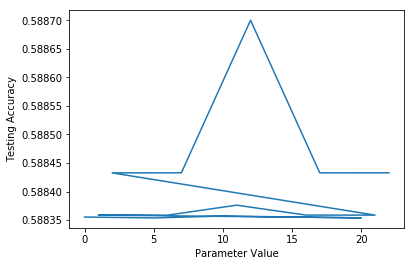

In [25]:
lr_prob=lr_model.predict_proba(X_test)
log_loss(y_test, lr_prob)
plt.plot(index, accuracy_score)
plt.xlabel('Parameter Value')
plt.ylabel('Testing Accuracy')

In [26]:
from sklearn.linear_model import LogisticRegression 

lr_model = LogisticRegression(C = 0.001, solver = 'liblinear')
lr_model.fit(X_train, y_train)
lr_model

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

### Model Evaluation Using Test Set

In [27]:
from sklearn.metrics import log_loss

In [36]:
test_df = pd.read_csv("Data_Collision.csv")
test_df.head()

test_feature = test_df[['WEATHER','ROADCOND']]
test_feature = pd.concat([test_feature,pd.get_dummies(test_df['WEATHER'])], axis=1)
test_feature = pd.concat([test_feature,pd.get_dummies(test_df['ROADCOND'])], axis=1)

test_feature.drop(['WEATHER','ROADCOND'], axis = 1,inplace=True)
 
X_S_test= test_feature
X_S_test = preprocessing.StandardScaler().fit(X_S_test).transform(X_S_test)
y_S_test = test_df['SEVERITYCODE'].values

lr_yhat = lr_model.predict(X_S_test)
j4 = round(jaccard_similarity_score(y_S_test, lr_yhat), 2)
f4 = round(f1_score(y_S_test, lr_yhat, average = 'weighted'), 2)


print (j4,f4)


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0.7 0.58


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.


In [37]:
from sklearn.metrics import log_loss
lr_prob = lr_model.predict_proba(X_S_test)
ll_list = [ round(log_loss(y_S_test, lr_prob), 2)]
ll_list

[0.59]

### Classification Accuracy

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
|Logistic Regression | 0.7     | 0.58     | 0.59    |